### Name: Ashish Bhagchandani
### Github Username: ashishbhagchandani
### USC ID: 4690271015
### Homework 4
#### (Used one late day from six late days)

In [1]:
import os
import pandas as pd
import glob
import collections
import csv
import numpy as np
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from matplotlib import pyplot as plt
import warnings
from sklearn.metrics import roc_curve, auc, confusion_matrix,roc_auc_score,accuracy_score
import statsmodels.api as sm
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
import itertools
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [2]:
dataLinks = []
path = "../data/AReM"
dir_list = os.listdir(path)
for i in range(len(dir_list)):
    a = dir_list[i].split(".")
    if a[-1] == "pdf":
        continue
    pathd = f"../data/AReM/{dir_list[i]}"
    dir_listd = os.listdir(pathd)
    for j in range(len(dir_listd)):
        dataLinks.append(f"../data/AReM/{dir_list[i]}/{dir_listd[j]}")

files = os.path.join("../data/AReM/bending1", "dataset*.csv")
files = glob.glob(files)
trainlinkbending1 = []
testlinkbending1 = []
for i in range(len(files)):
    a = files[i].split("\\")
    if a[-1][:-4] == "dataset1" or a[-1][:-4] == "dataset2":
        testlinkbending1.append(files[i])
    else:
        trainlinkbending1.append(files[i])

files = os.path.join("../data/AReM/bending2", "dataset*.csv")
files = glob.glob(files)
trainlinkbending2 = []
testlinkbending2 = []
for i in range(len(files)):
    a = files[i].split("\\")
    if a[-1][:-4] == "dataset1" or a[-1][:-4] == "dataset2":
        testlinkbending2.append(files[i])
    else:
        trainlinkbending2.append(files[i])

files = os.path.join("../data/AReM/cycling", "dataset*.csv")
files = glob.glob(files)
trainlinkcycling = []
testlinkcycling = []
for i in range(len(files)):
    a = files[i].split("\\")
    if a[-1][:-4] == "dataset1" or a[-1][:-4] == "dataset2" or a[-1][:-4] == "dataset3":
        testlinkcycling.append(files[i])
    else:
        trainlinkcycling.append(files[i])
        
files = os.path.join("../data/AReM/lying", "dataset*.csv")
files = glob.glob(files)
trainlinklying = []
testlinklying = []
for i in range(len(files)):
    a = files[i].split("\\")
    if a[-1][:-4] == "dataset1" or a[-1][:-4] == "dataset2" or a[-1][:-4] == "dataset3":
        testlinklying.append(files[i])
    else:
        trainlinklying.append(files[i])
        
files = os.path.join("../data/AReM/sitting", "dataset*.csv")
files = glob.glob(files)
trainlinksitting = []
testlinksitting = []
for i in range(len(files)):
    a = files[i].split("\\")
    if a[-1][:-4] == "dataset1" or a[-1][:-4] == "dataset2" or a[-1][:-4] == "dataset3":
        testlinksitting.append(files[i])
    else:
        trainlinksitting.append(files[i])
        
files = os.path.join("../data/AReM/standing", "dataset*.csv")
files = glob.glob(files)
trainlinkstanding = []
testlinkstanding = []
for i in range(len(files)):
    a = files[i].split("\\")
    if a[-1][:-4] == "dataset1" or a[-1][:-4] == "dataset2" or a[-1][:-4] == "dataset3":
        testlinkstanding.append(files[i])
    else:
        trainlinkstanding.append(files[i])
        
files = os.path.join("../data/AReM/walking", "dataset*.csv")
files = glob.glob(files)
trainlinkwalking = []
testlinkwalking = []
for i in range(len(files)):
    a = files[i].split("\\")
    if a[-1][:-4] == "dataset1" or a[-1][:-4] == "dataset2" or a[-1][:-4] == "dataset3":
        testlinkwalking.append(files[i])
    else:
        trainlinkwalking.append(files[i])
        
trainDatalinks = trainlinkbending1 + trainlinkbending2 + trainlinkcycling + trainlinklying + trainlinksitting + trainlinkstanding + trainlinkwalking
testDatalinks = testlinkbending1 + testlinkbending2 + testlinkcycling + testlinklying + testlinksitting + testlinkstanding + testlinkwalking

### 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a)-i

In [3]:
def getfsData1(links):
    featureDict = collections.defaultdict(list)
    sniffer = csv.Sniffer()
    def minMax(x):
        return pd.Series(index=['min','max', 'mean', 'std', 'median', 'firstq', 'thirdq'],data=[x.min(),x.max(), x.mean(), x.std(), x.median(), x.quantile(0.25), x.quantile(0.75)])
    for k in range(len(links)):
        fsData = pd.read_csv(links[k], skiprows=4, usecols=range(0,7))
        minmax = fsData.apply(minMax).T.values.tolist()
        for m in range(1,len(minmax)):
            featureDict['min'+str(m)].append(minmax[m][0])
            featureDict['max'+str(m)].append(minmax[m][1])
            featureDict['mean'+str(m)].append(minmax[m][2])
            featureDict['std'+str(m)].append(minmax[m][3])
            featureDict['median'+str(m)].append(minmax[m][4])
            featureDict['firstq'+str(m)].append(minmax[m][5])
            featureDict['thirdq'+str(m)].append(minmax[m][6])
        featureDict['label'].append(links[k].split("\\")[0].split("/")[-1])
    return featureDict

In [4]:
getfeatureDict1 = getfsData1(trainDatalinks)
fsData1 = pd.DataFrame.from_dict(getfeatureDict1, orient="index").T
fsData1

min1   max1      mean1      std1 median1 firstq1  thirdq1 min2   max2  \
0    35.0   47.4    43.9545  1.558835   44.33    43.0     45.0  0.0    1.7   
1    33.0  47.75  42.179813  3.670666    43.5   39.15     45.0  0.0    3.0   
2    33.0  45.75  41.678063   2.24349   41.75   41.33    42.75  0.0   2.83   
3    37.0   48.0  43.454958  1.386098   43.25    42.5     45.0  0.0   1.58   
4   36.25   48.0  43.969125  1.618364    44.5   43.31    44.67  0.0    1.5   
..    ...    ...        ...       ...     ...     ...      ...  ...    ...   
64  20.75  46.25  34.763333  4.742208   35.29   31.67    38.25  0.0  12.68   
65   21.5   51.0  34.935813  4.645944    35.5    32.0  38.0625  0.0  12.21   
66  18.33  47.67  34.333042   4.94877   34.75   31.25     38.0  0.0  12.48   
67  18.33  45.75  34.599875   4.73179  35.125    31.5     38.0  0.0  15.37   
68   15.5  43.67  34.225875  4.441798   34.75   31.25    37.25  0.0  17.24   

       mean2  ...  firstq5 thirdq5 min6   max6     mean6      std6 median6  \
0    0.42625  ...  35.3625    36.5  0.0   1.79  0.493292  0.513506    0.43   
1   0.696042  ...  30.4575   36.33  0.0   2.18  0.613521  0.524317     0.5   
2   0.535979  ...  28.4575   31.25  0.0   1.79  0.383292  0.389164    0.43   
3   0.378083  ...    22.25    24.0  0.0   5.26  0.679646  0.622534     0.5   
4   0.413125  ...     20.5   23.75  0.0   2.96  0.555313  0.487826    0.49   
..       ...  ...      ...     ...  ...    ...       ...       ...     ...   
64  4.223792  ...    14.25   18.33  0.0   9.39  3.288271  1.647528    3.27   
65   4.11575  ...  14.2375   18.25  0.0  10.21  3.280021  1.700918   3.015   
66  4.396958  ...    13.75    18.0  0.0   8.01  3.261583   1.61729    2.98   
67  4.398833  ...     14.0   18.25  0.0   8.86  3.289542   1.68017   3.015   
68    4.3545  ...    14.33   18.25  0.0   9.42  3.479542  1.761146    3.27   

   firstq6 thirdq6     label  
0      0.0    0.94  bending1  
1      0.0     1.0  bending1  
2      0.0     0.5  bending1  
3     0.43    0.87  bending1  
4      0.0    0.83  bending1  
..     ...     ...       ...  
64    2.05   4.305   walking  
65    2.12     4.5   walking  
66    2.05    4.32   walking  
67    2.12    4.26   walking  
68    2.24  4.5375   walking  

[69 rows x 43 columns]

In [5]:
def my_func(row):
    if row['label'] == 'bending1' or row['label']=='bending2':
        val = 1
    else:
        val = 0
    return val
fsData1['class'] = fsData1.apply(my_func, axis=1)
fsData1.drop("label", axis=1, inplace=True)
fsData1

min1   max1      mean1      std1 median1 firstq1  thirdq1 min2   max2  \
0    35.0   47.4    43.9545  1.558835   44.33    43.0     45.0  0.0    1.7   
1    33.0  47.75  42.179813  3.670666    43.5   39.15     45.0  0.0    3.0   
2    33.0  45.75  41.678063   2.24349   41.75   41.33    42.75  0.0   2.83   
3    37.0   48.0  43.454958  1.386098   43.25    42.5     45.0  0.0   1.58   
4   36.25   48.0  43.969125  1.618364    44.5   43.31    44.67  0.0    1.5   
..    ...    ...        ...       ...     ...     ...      ...  ...    ...   
64  20.75  46.25  34.763333  4.742208   35.29   31.67    38.25  0.0  12.68   
65   21.5   51.0  34.935813  4.645944    35.5    32.0  38.0625  0.0  12.21   
66  18.33  47.67  34.333042   4.94877   34.75   31.25     38.0  0.0  12.48   
67  18.33  45.75  34.599875   4.73179  35.125    31.5     38.0  0.0  15.37   
68   15.5  43.67  34.225875  4.441798   34.75   31.25    37.25  0.0  17.24   

       mean2  ...  firstq5 thirdq5 min6   max6     mean6      std6 median6  \
0    0.42625  ...  35.3625    36.5  0.0   1.79  0.493292  0.513506    0.43   
1   0.696042  ...  30.4575   36.33  0.0   2.18  0.613521  0.524317     0.5   
2   0.535979  ...  28.4575   31.25  0.0   1.79  0.383292  0.389164    0.43   
3   0.378083  ...    22.25    24.0  0.0   5.26  0.679646  0.622534     0.5   
4   0.413125  ...     20.5   23.75  0.0   2.96  0.555313  0.487826    0.49   
..       ...  ...      ...     ...  ...    ...       ...       ...     ...   
64  4.223792  ...    14.25   18.33  0.0   9.39  3.288271  1.647528    3.27   
65   4.11575  ...  14.2375   18.25  0.0  10.21  3.280021  1.700918   3.015   
66  4.396958  ...    13.75    18.0  0.0   8.01  3.261583   1.61729    2.98   
67  4.398833  ...     14.0   18.25  0.0   8.86  3.289542   1.68017   3.015   
68    4.3545  ...    14.33   18.25  0.0   9.42  3.479542  1.761146    3.27   

   firstq6 thirdq6 class  
0      0.0    0.94     1  
1      0.0     1.0     1  
2      0.0     0.5     1  
3     0.43    0.87     1  
4      0.0    0.83     1  
..     ...     ...   ...  
64    2.05   4.305     0  
65    2.12     4.5     0  
66    2.05    4.32     0  
67    2.12    4.26     0  
68    2.24  4.5375     0  

[69 rows x 43 columns]

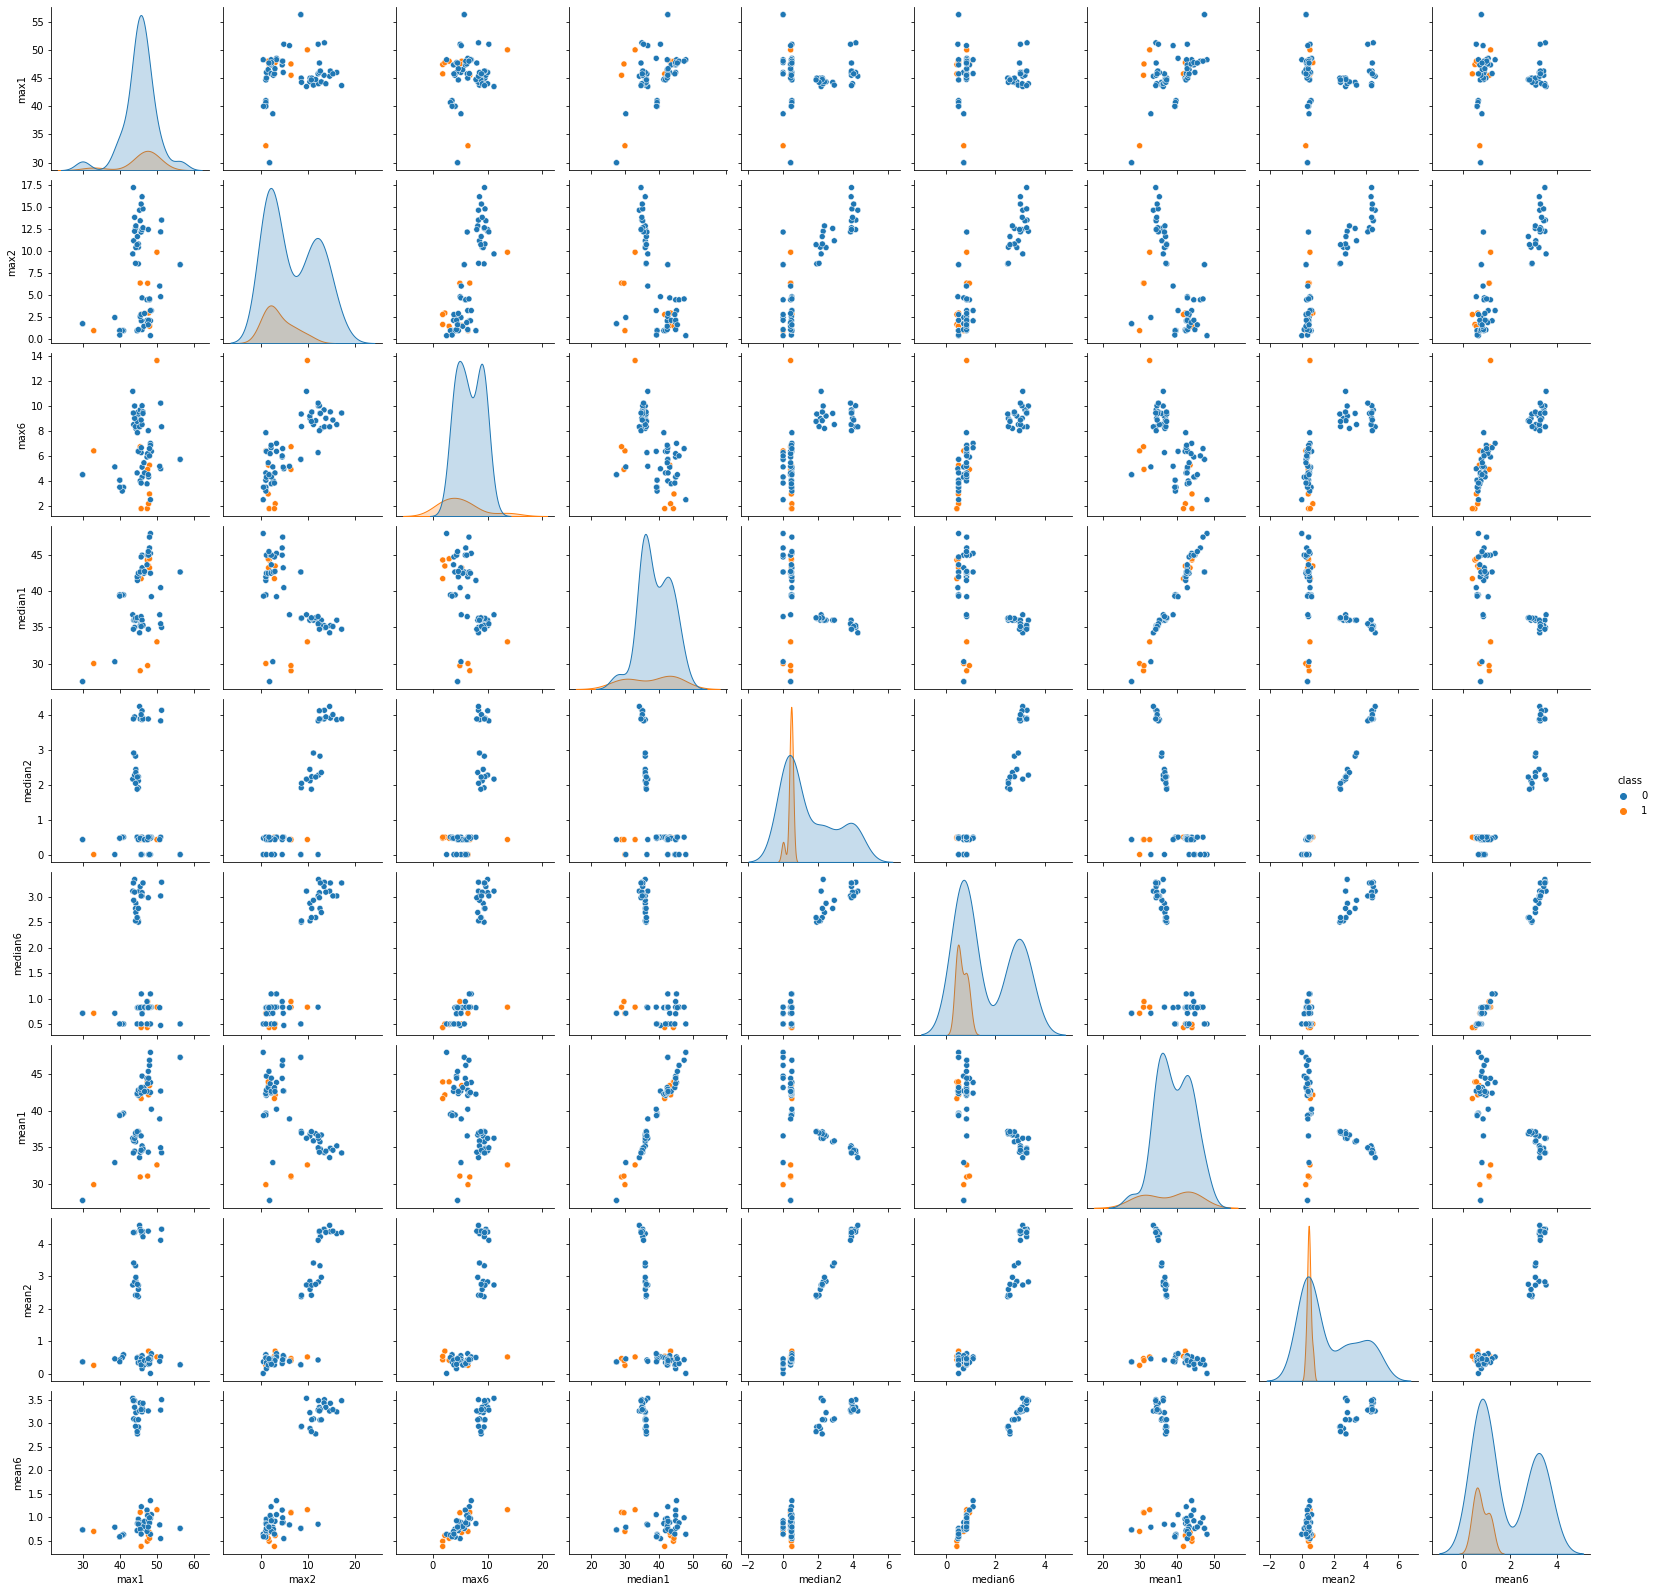

In [6]:
import seaborn as sns
ins = [1,2,6]
fea = ['max', 'median', 'mean']
sFeatures = []
for i in range(3):
    for j in range(3):
        sFeatures.append(fea[i]+str(ins[j]))
fsData1 = fsData1[sFeatures + ['class']]
sns.pairplot(fsData1, hue='class')

### 2(a)-ii

In [7]:
def getfsData2(links):
    featureDict = collections.defaultdict(list)
    sniffer = csv.Sniffer()
    def minMax(x):
        return pd.Series(index=['min','max', 'mean', 'std', 'median', 'firstq', 'thirdq'],data=[x.min(),x.max(), x.mean(), x.std(), x.median(), x.quantile(0.25), x.quantile(0.75)])
    for k in range(len(links)):
        fsData = pd.read_csv(links[k], skiprows=4, usecols=range(0,7))
        z = 1
        for s in np.array_split(fsData,2):
            minmax = s.apply(minMax).T.values.tolist()
            for m in range(1,len(minmax)):
                featureDict['min'+str(z)].append(minmax[m][0])
                featureDict['max'+str(z)].append(minmax[m][1])
                featureDict['mean'+str(z)].append(minmax[m][2])
                featureDict['std'+str(z)].append(minmax[m][3])
                featureDict['median'+str(z)].append(minmax[m][4])
                featureDict['firstq'+str(z)].append(minmax[m][5])
                featureDict['thirdq'+str(z)].append(minmax[m][6])
                z+=1
        featureDict['label'].append(links[k].split("\\")[0].split("/")[-1])
    return featureDict

In [8]:
getfeatureDict2 = getfsData2(trainDatalinks)
fsData2 = pd.DataFrame.from_dict(getfeatureDict2, orient="index").T
fsData2

min1   max1      mean1      std1 median1  firstq1  thirdq1 min2   max2  \
0    36.5   46.5  44.057167  1.556971    44.5    43.25     45.0  0.0    1.5   
1   33.75  47.75  43.278875  3.473355    45.0     42.0    45.25  0.0    3.0   
2    33.0  45.75  41.621208  3.118644   42.33  39.6525    44.25  0.0   2.83   
3    39.0   48.0  44.117042  1.359836    45.0     43.5     45.0  0.0    1.3   
4   36.67   45.0  43.486208  1.281976   43.71    42.33     44.5  0.0    1.3   
..    ...    ...        ...       ...     ...      ...      ...  ...    ...   
64  22.33   46.0   34.96625  4.733014    35.5     32.0    38.75  0.0  12.68   
65   21.5  45.67  34.737042  4.276717    35.5     32.0    37.75  0.0  12.21   
66  18.33   45.0  33.886458  5.143776  34.375  30.4575     37.5  0.0  12.44   
67  18.33   44.0  34.836458  4.869092   35.75     32.0    38.69  0.0  12.38   
68   23.0  42.75  34.329333  4.549837   34.71    31.31  37.5425  0.0   14.5   

       mean2  ... firstq11 thirdq11 min12  max12    mean12     std12 median12  \
0   0.381042  ...     33.0    36.25   0.0    1.5  0.388333  0.478528      0.0   
1   0.673292  ...    28.75    33.75   0.0   2.18  0.586083  0.491873     0.47   
2   0.623083  ...    28.31  30.5625   0.0    1.5    0.3475  0.363144     0.43   
3   0.250042  ...     22.5    23.75   0.0   4.06  0.543875  0.473445      0.5   
4   0.378667  ...     21.0     23.5   0.0   2.96   0.58575  0.487918      0.5   
..       ...  ...      ...      ...   ...    ...       ...       ...      ...   
64  4.207958  ...     14.0     18.5   0.0   9.39  3.430208  1.647979     3.35   
65  4.217333  ...     14.5    18.25   0.0  10.21  3.225917  1.665326    3.085   
66  4.332208  ...  13.6275    18.25   0.0   8.01   3.27475  1.670593    2.955   
67   4.25775  ...  13.9375    18.25  0.47   8.84  3.409458  1.707089     3.11   
68  4.315917  ...    14.33     18.0  0.43   9.12  3.577833  1.794112     3.29   

   firstq12 thirdq12     label  
0       0.0     0.71  bending1  
1       0.0     0.87  bending1  
2       0.0      0.5  bending1  
3      0.43     0.71  bending1  
4    0.4225     0.83  bending1  
..      ...      ...       ...  
64     2.17     4.44   walking  
65     2.05     4.35   walking  
66     2.05   4.4375   walking  
67     2.17    4.345   walking  
68     2.29    4.725   walking  

[69 rows x 85 columns]

In [9]:
def my_func(row):
    if row['label'] == 'bending1' or row['label']=='bending2':
        val = 1
    else:
        val = 0
    return val
fsData2['class'] = fsData2.apply(my_func, axis=1)
fsData2.drop("label", axis=1, inplace=True)
fsData2

min1   max1      mean1      std1 median1  firstq1  thirdq1 min2   max2  \
0    36.5   46.5  44.057167  1.556971    44.5    43.25     45.0  0.0    1.5   
1   33.75  47.75  43.278875  3.473355    45.0     42.0    45.25  0.0    3.0   
2    33.0  45.75  41.621208  3.118644   42.33  39.6525    44.25  0.0   2.83   
3    39.0   48.0  44.117042  1.359836    45.0     43.5     45.0  0.0    1.3   
4   36.67   45.0  43.486208  1.281976   43.71    42.33     44.5  0.0    1.3   
..    ...    ...        ...       ...     ...      ...      ...  ...    ...   
64  22.33   46.0   34.96625  4.733014    35.5     32.0    38.75  0.0  12.68   
65   21.5  45.67  34.737042  4.276717    35.5     32.0    37.75  0.0  12.21   
66  18.33   45.0  33.886458  5.143776  34.375  30.4575     37.5  0.0  12.44   
67  18.33   44.0  34.836458  4.869092   35.75     32.0    38.69  0.0  12.38   
68   23.0  42.75  34.329333  4.549837   34.71    31.31  37.5425  0.0   14.5   

       mean2  ... firstq11 thirdq11 min12  max12    mean12     std12 median12  \
0   0.381042  ...     33.0    36.25   0.0    1.5  0.388333  0.478528      0.0   
1   0.673292  ...    28.75    33.75   0.0   2.18  0.586083  0.491873     0.47   
2   0.623083  ...    28.31  30.5625   0.0    1.5    0.3475  0.363144     0.43   
3   0.250042  ...     22.5    23.75   0.0   4.06  0.543875  0.473445      0.5   
4   0.378667  ...     21.0     23.5   0.0   2.96   0.58575  0.487918      0.5   
..       ...  ...      ...      ...   ...    ...       ...       ...      ...   
64  4.207958  ...     14.0     18.5   0.0   9.39  3.430208  1.647979     3.35   
65  4.217333  ...     14.5    18.25   0.0  10.21  3.225917  1.665326    3.085   
66  4.332208  ...  13.6275    18.25   0.0   8.01   3.27475  1.670593    2.955   
67   4.25775  ...  13.9375    18.25  0.47   8.84  3.409458  1.707089     3.11   
68  4.315917  ...    14.33     18.0  0.43   9.12  3.577833  1.794112     3.29   

   firstq12 thirdq12 class  
0       0.0     0.71     1  
1       0.0     0.87     1  
2       0.0      0.5     1  
3      0.43     0.71     1  
4    0.4225     0.83     1  
..      ...      ...   ...  
64     2.17     4.44     0  
65     2.05     4.35     0  
66     2.05   4.4375     0  
67     2.17    4.345     0  
68     2.29    4.725     0  

[69 rows x 85 columns]

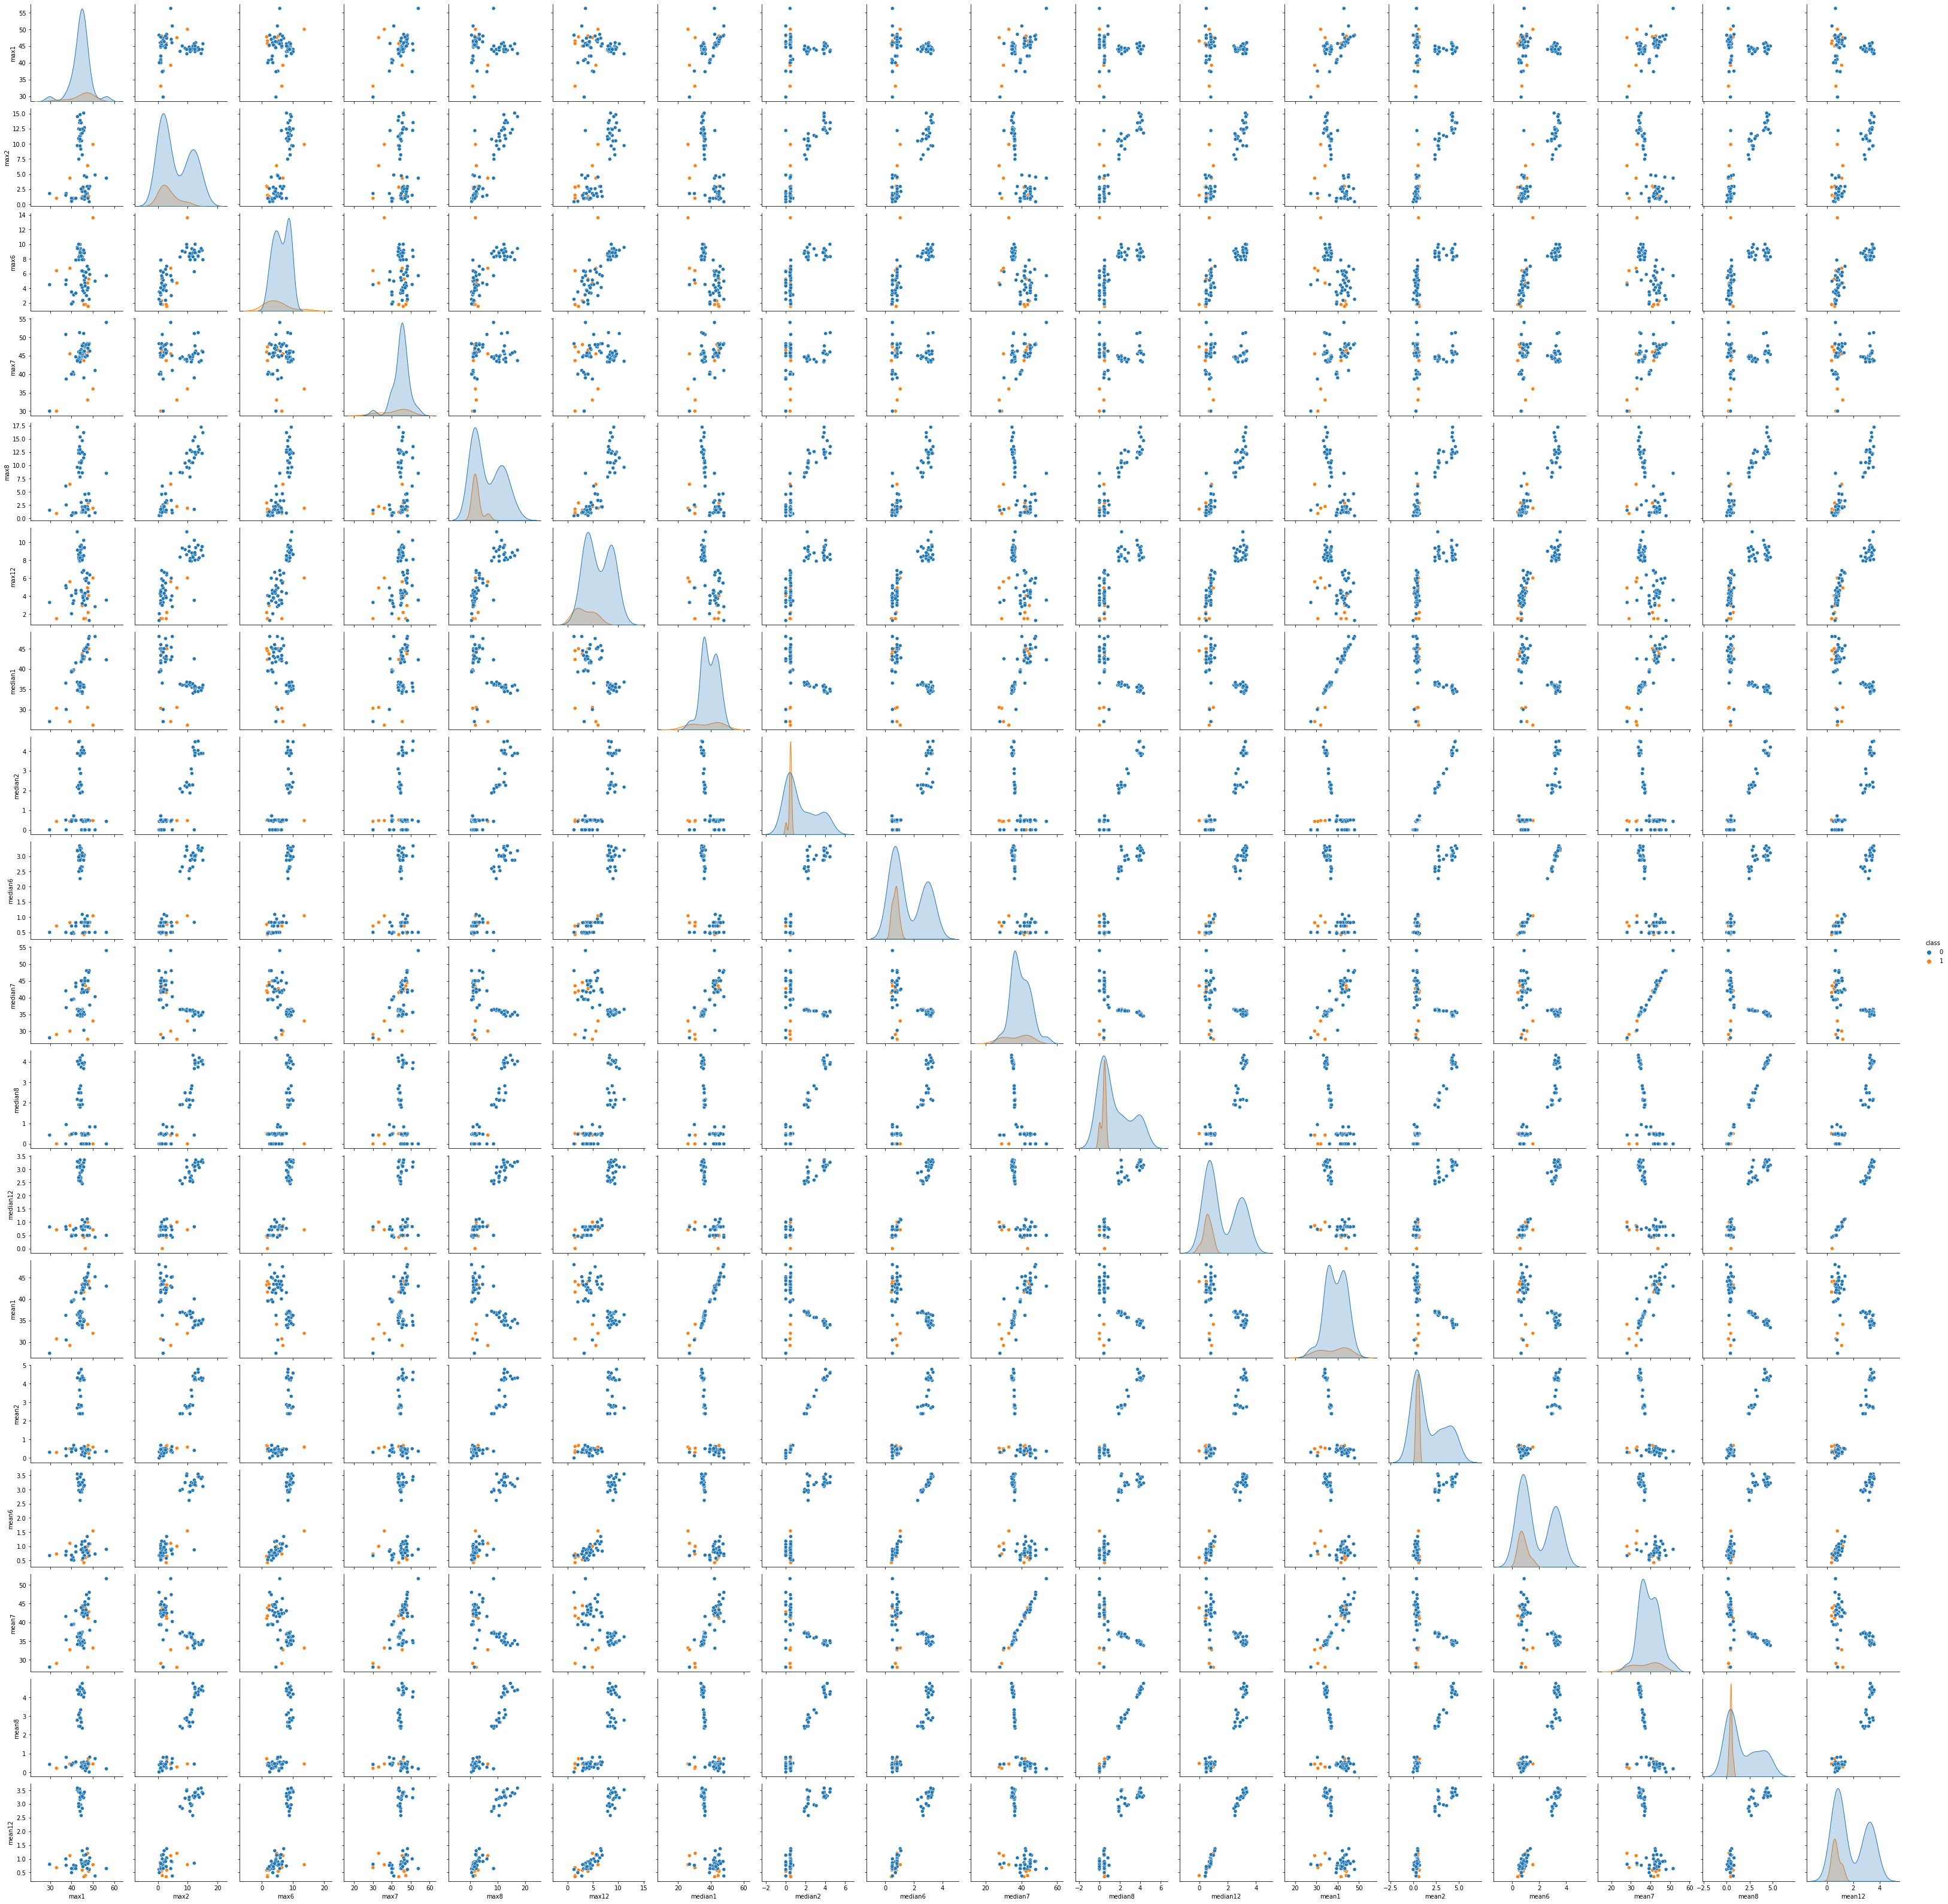

In [10]:
ins = [1,2,6,7,8,12]
fea = ['max', 'median', 'mean']
sFeatures = []
for i in range(3):
    for j in range(6):
        sFeatures.append(fea[i]+str(ins[j]))
fsData2 = fsData2[sFeatures + ['class']]
fsData2
sns.pairplot(fsData2, hue='class')

### By seeing at both the plots we the class separation looks same for bending and other activities, co-relations have changed a bit 

### 2(a)-iii

In [11]:
def getfsData3(links, getsplit):
    featureDict = collections.defaultdict(list)
    sniffer = csv.Sniffer()
    def minMax(x):
        return pd.Series(index=['max', 'median', 'mean'],data=[x.max(), x.median(), x.mean()])
    for k in range(len(links)):
        fsData = pd.read_csv(links[k], skiprows=4, usecols=range(0,7))
        z = 1
        for s in np.array_split(fsData,getsplit):
            minmax = s.apply(minMax).T.values.tolist()
            for m in range(1,len(minmax)):
                featureDict['max'+str(z)].append(minmax[m][0])
                featureDict['median'+str(z)].append(minmax[m][1])
                featureDict['mean'+str(z)].append((minmax[m][2]))
                z+=1
        featureDict['label'].append(links[k].split("\\")[0].split("/")[-1])
    
    fsData3 = pd.DataFrame.from_dict(featureDict, orient="index").T
    
    fsData3['class'] = fsData3.apply(my_func, axis=1)
    fsData3.drop("label", axis=1, inplace=True)
    
    trainX = fsData3.iloc[:, :-1]
    trainY = fsData3.iloc[:, -1]
    
    
    return trainX, trainY

In [12]:
warnings.filterwarnings('ignore')
bestscore = float('-inf')
bestfeatures = []
bestl = 0
data1 = {}
bestf = []
for i in range(1, 21):
    trainX, trainY = getfsData3(trainDatalinks, i)
    
    model = LogisticRegression()
    refd = RFECV(estimator=model ,cv= StratifiedKFold(5), scoring='accuracy')
    feature = refd.fit(trainX,trainY).ranking_==1

    trainX=trainX.loc[:,feature]

    model = model.fit(trainX, trainY)
    predicted = model.predict(trainX).tolist()

    acc = accuracy_score(trainY,predicted)
    data1[(i,len(trainX.columns))] = acc
    if acc > bestscore:
        bestscore = acc
        bestfeatures = trainX.columns
        bestl = i

print('Best l value:', bestl)
print('Best features selected:', bestfeatures)
print('Accuracy score achieved (Train):',bestscore)

Best l value: 1
Best features selected: Index(['mean1', 'max2', 'median3', 'mean3', 'max5', 'median5', 'mean5'], dtype='object')
Accuracy score achieved (Train): 1.0


In [13]:
table1 = pd.DataFrame({'Pair (l,p)': data1.keys(), 'Accuracy score': data1.values()})
table1

Pair (l,p)  Accuracy score
0      (1, 7)        1.000000
1     (2, 28)        1.000000
2     (3, 41)        1.000000
3      (4, 1)        0.956522
4     (5, 67)        1.000000
5      (6, 7)        1.000000
6      (7, 4)        1.000000
7     (8, 13)        1.000000
8     (9, 11)        1.000000
9     (10, 1)        0.971014
10   (11, 84)        1.000000
11   (12, 23)        1.000000
12    (13, 6)        1.000000
13    (14, 1)        0.971014
14   (15, 81)        1.000000
15   (16, 16)        1.000000
16   (17, 21)        1.000000
17   (18, 23)        1.000000
18   (19, 26)        1.000000
19    (20, 1)        0.985507

### The correct way to apply cross validation is to apply cross validation to all the parameters before selecting parameters. Feature selection should be done while performing cross validation

### 2(a)-iv

Score on train dataset 1.0
Confusion matrix
[[60  0]
 [ 0  9]]


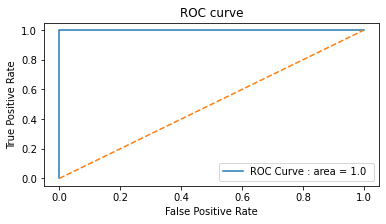

AUC Score on train dataset 1.0
         Current function value: 0.000001
         Iterations: 15
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                   69
Model:                          Logit   Df Residuals:                       62
Method:                           MLE   Df Model:                            6
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                   1.000
Time:                        12:04:55   Log-Likelihood:            -5.0824e-05
converged:                      False   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 9.588e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
mean1         -2.9817     73.428     -0.041      0.968    -146.898     140.935
max2          -2.7981    140.265  

In [14]:
warnings.simplefilter('ignore', ConvergenceWarning)
X, y = getfsData3(trainDatalinks, bestl)
X = X[bestfeatures]
model = LogisticRegression(penalty="none", max_iter=105)
model.fit(X, y)
yPred = model.predict(X)
yProb = model.predict_proba(X)[:,1]
score = accuracy_score(yPred, y)

print('Score on train dataset',score)

cm = confusion_matrix(y, yPred)
print('Confusion matrix')
print(cm)

fpr, tpr, _ = roc_curve(y, yProb)
fig, axes = plt.subplots(figsize=(6, 3))
roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr, label="ROC Curve : area = {} ".format(roc_auc))
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curve")
plt.show()

dataauc = roc_auc_score(y, yProb)
print('AUC Score on train dataset', dataauc)

y = pd.DataFrame(y)
X = pd.DataFrame(X)
statsM = sm.Logit(y.astype(float), X.astype(float))
statsM = statsM.fit(model='bfgs',maxiter=15)
print(statsM.summary())

### 2(a)-v

score on test data 1.0
[[15  0]
 [ 0  4]]


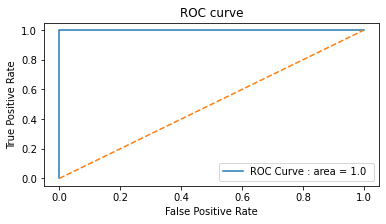

In [15]:
Xtest, ytest = getfsData3(testDatalinks, bestl)
Xtest = Xtest[bestfeatures]

model = LogisticRegression(penalty="none", max_iter=105)
model.fit(Xtest, ytest)
yPred = model.predict(Xtest)
yProbs = model.predict_proba(Xtest)[:,1]
testscore = accuracy_score(yPred, ytest)
print('score on test data',testscore)
cm = confusion_matrix(ytest, yPred)
print(cm)
fpr, tpr, _ = roc_curve(ytest, yProbs)

fig, axes = plt.subplots(figsize=(6, 3))
roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr, label="ROC Curve : area = {} ".format(roc_auc))
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curve")
plt.show()

In [16]:
print('Test score',testscore)
print('Train score',score)

Test score 1.0
Train score 1.0


### 2(a)-vi

#### Yes the classes are well seprated, specially when number of splits are increased. Also with the stats model summary we got that Complete Separation: The results show that there iscomplete separation. In this case the Maximum Likelihood Estimator does not exist and the parameters are not identified. 

### 2(a)-vii

confusion matrix
[[60  0]
 [ 0 60]]
AUC 1.0


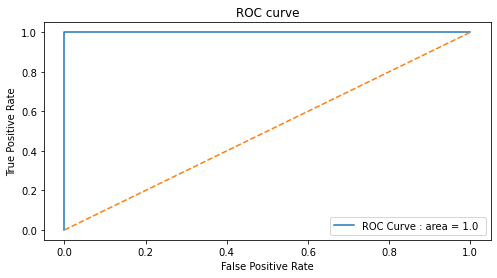

In [17]:
smote = SMOTE(random_state = 1)
XSampled, ySampled = smote.fit_resample(X, y)
model = LogisticRegression(penalty="none", max_iter=25)
model.fit(XSampled,ySampled)
yPredSampled = model.predict(XSampled)
yProbSampled = model.predict_proba(XSampled)[:,1]

cm = confusion_matrix(ySampled, yPredSampled)
print('confusion matrix')
print(cm)
fpr, tpr, _ = roc_curve(ySampled, yProbSampled)

fig, axes = plt.subplots(figsize=(8, 4))
roc_auc = auc(fpr, tpr)
print('AUC', roc_auc)
axes.plot(fpr, tpr, label="ROC Curve : area = {} ".format(roc_auc))
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curve")
plt.show()

# 2(b)-i

In [18]:
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')
bestscore = float('-inf')
bestfeatures = []
bestl = 0
data1 = {}
bestf = []
for i in range(1, 21):
    trainX, trainY = getfsData3(trainDatalinks, i)
    trainX = (trainX-trainX.mean())/trainX.std()
    aucd1= []
    bestf = []
    trainindex=[]
    validindex=[]
    acc_score = []
    
    model = LogisticRegression(penalty="l1", solver = 'liblinear')
    refd = RFECV(estimator=model ,cv= StratifiedKFold(5), scoring='accuracy')
    feature = refd.fit(trainX,trainY).ranking_==1

    trainX=trainX.loc[:,feature]

    model = model.fit(trainX, trainY)
    predicted = model.predict(trainX).tolist()

    acc = accuracy_score(trainY,predicted)
    data1[(i,len(trainX.columns))] = acc
    if acc > bestscore:
        bestscore = acc
        bestfeatures = trainX.columns
        bestl = i
print('Best l value:', bestl)
print('Best features selected:', bestfeatures)
print('Accuracy score achieved (Train):',bestscore)

Best l value: 5
Best features selected: Index(['max5', 'mean5', 'mean13', 'median22', 'mean29'], dtype='object')
Accuracy score achieved (Train): 1.0


In [19]:
table2 = pd.DataFrame({'Pair (l,p)': data1.keys(), 'Accuracy score': data1.values()})
table2

Pair (l,p)  Accuracy score
0      (1, 1)        0.971014
1      (2, 1)        0.956522
2      (3, 1)        0.971014
3      (4, 1)        0.971014
4      (5, 5)        1.000000
5      (6, 1)        0.971014
6      (7, 1)        0.971014
7      (8, 1)        0.956522
8      (9, 1)        0.956522
9     (10, 1)        0.971014
10    (11, 1)        0.971014
11    (12, 1)        0.971014
12    (13, 1)        0.971014
13    (14, 1)        0.971014
14    (15, 5)        1.000000
15    (16, 1)        0.971014
16    (17, 1)        0.971014
17    (18, 1)        0.971014
18    (19, 1)        0.971014
19    (20, 1)        0.971014

test score 1.0
Confusion matrix
[[15  0]
 [ 0  4]]


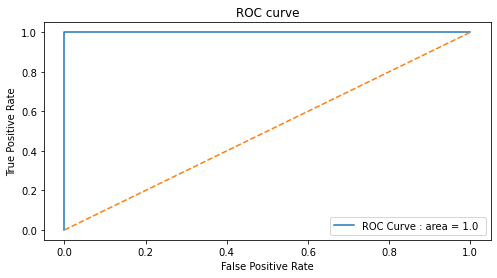

In [20]:
Xtest, ytest = getfsData3(testDatalinks, bestl)
Xtest = Xtest[bestfeatures]
model = LogisticRegression(penalty="l1", solver = 'liblinear',max_iter=105)
model.fit(Xtest, ytest)
yPred = model.predict(Xtest)
yProbs = model.predict_proba(Xtest)[:,1]
testscore = accuracy_score(yPred, ytest)
print('test score', testscore)
cm = confusion_matrix(ytest, yPred)
print('Confusion matrix')
print(cm)
fpr, tpr, _ = roc_curve(ytest, yProbs)

fig, axes = plt.subplots(figsize=(8, 4))
roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr, label="ROC Curve : area = {} ".format(roc_auc))
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curve")
plt.show()

In [21]:
print('test dataset score', testscore)
print('train dataset score', bestscore)

test dataset score 1.0
train dataset score 1.0


### 2(b)-ii

#### L1 -penalized performs better in comparision, as it is easy to implement also took less time. At the end both variable selection using p values and L1 -penalized gave same accuracy score.

### 2(c)-i

In [22]:
def getfsData5(links, getsplit):
    featureDict = collections.defaultdict(list)
    sniffer = csv.Sniffer()
    def minMax(x):
        return pd.Series(index=['max', 'median', 'mean'],data=[x.max(), x.median(), x.mean()])
    for k in range(len(links)):
        fsData = pd.read_csv(links[k], skiprows=4, usecols=range(0,7))
        z = 1
        for s in np.array_split(fsData,getsplit):
            minmax = s.apply(minMax).T.values.tolist()
            for m in range(1,len(minmax)):
                featureDict['max'+str(z)].append(minmax[m][0])
                featureDict['median'+str(z)].append(minmax[m][1])
                featureDict['mean'+str(z)].append((minmax[m][2]))
                z+=1
        if links[k].split("\\")[0].split("/")[-1] == 'bending1' or links[k].split("\\")[0].split("/")[-1] == 'bending2':
            featureDict['label'].append(0)
        elif links[k].split("\\")[0].split("/")[-1] == 'cycling':
            featureDict['label'].append(1)
        elif links[k].split("\\")[0].split("/")[-1] == 'lying':
            featureDict['label'].append(2)
        elif links[k].split("\\")[0].split("/")[-1] == 'sitting':
            featureDict['label'].append(3)
        elif links[k].split("\\")[0].split("/")[-1] == 'standing':
            featureDict['label'].append(4)
        elif links[k].split("\\")[0].split("/")[-1] == 'walking':
            featureDict['label'].append(5)
    
    fsData5 = pd.DataFrame.from_dict(featureDict, orient="index").T
    trainX = fsData5.iloc[:, :-1]
    trainY = fsData5.iloc[:, -1]
    
    
    return trainX, trainY

In [23]:
warnings.filterwarnings('ignore')
bestscore = float('-inf')
bestfeatures = []
bestl = 0
data1 = {}
bestf = []
for i in range(1, 21):
    trainX, trainY = getfsData5(trainDatalinks, i)
    trainX = (trainX-trainX.mean())/trainX.std()
    
    model = LogisticRegression(penalty="l1", solver = 'liblinear')
    refd = RFECV(estimator=model ,cv= StratifiedKFold(5), scoring='accuracy')
    feature = refd.fit(trainX,trainY).ranking_==1

    trainX=trainX.loc[:,feature]

    model = model.fit(trainX, trainY)
    predicted = model.predict(trainX).tolist()

    acc = accuracy_score(trainY,predicted)
    data1[(i,len(trainX.columns))] = acc
    if acc > bestscore:
        bestscore = acc
        bestfeatures = trainX.columns
        bestl = i
print('Best l value:', bestl)
print('Best features selected:', bestfeatures)
print('Accuracy score achieved (Train):',bestscore)

Best l value: 7
Best features selected: Index(['median4', 'mean5', 'max11', 'median13', 'max16', 'max22', 'max23',
       'median25', 'median26', 'median27', 'mean28', 'max32', 'max33', 'max36',
       'max38', 'max39', 'max42'],
      dtype='object')
Accuracy score achieved (Train): 1.0


In [24]:
table3 = pd.DataFrame({'Pair (l,p)': data1.keys(), 'Accuracy score': data1.values()})
table3

Pair (l,p)  Accuracy score
0      (1, 6)        0.898551
1      (2, 8)        0.942029
2     (3, 11)        0.942029
3     (4, 10)        0.985507
4     (5, 15)        0.985507
5     (6, 38)        0.985507
6     (7, 17)        1.000000
7     (8, 12)        0.942029
8     (9, 39)        1.000000
9    (10, 28)        1.000000
10   (11, 14)        0.956522
11   (12, 36)        1.000000
12    (13, 8)        0.869565
13   (14, 18)        0.985507
14   (15, 12)        0.971014
15    (16, 7)        0.884058
16   (17, 32)        1.000000
17   (18, 21)        0.971014
18   (19, 24)        1.000000
19   (20, 21)        1.000000

Train Accuracy :  1.0
confusion matrix
[[ 9  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 12]]


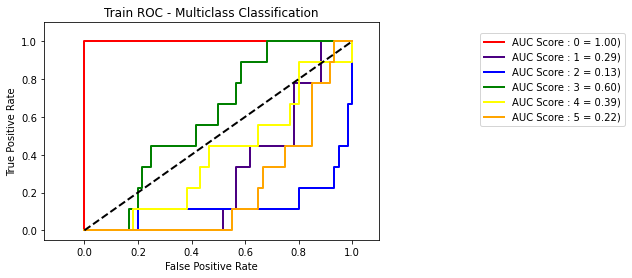

In [25]:
trainX, trainY = getfsData5(trainDatalinks, bestl)
trainX=(trainX-trainX.mean())/trainX.std()
trainX = trainX[bestfeatures]

model = LogisticRegression(penalty="l1", max_iter=15, solver = 'liblinear')
model.fit(trainX, trainY)
yPredTrain = model.predict(trainX)
yPredTrainProbs = model.predict_proba(trainX)
trainscore = accuracy_score(yPredTrain, trainY)

print("Train Accuracy : ", trainscore)

cm = confusion_matrix(trainY, yPredTrain)
print('confusion matrix')
print(cm)

yTrainL = preprocessing.label_binarize(trainY, classes=[0, 1, 2, 3, 4, 5])
predTrain = model.decision_function(trainX)
values = [0,1,2,3,4,5]
fpr_values = {}
tpr_values = {}
auc_values = {}
labelColours = itertools.cycle(['red', 'indigo', 'blue', 'green', 'yellow', 'orange'])
scoreLocation = "lower right"


for i in values:
    fpr_values[i], tpr_values[i], temp = roc_curve(yTrainL[:, 0], predTrain[:, i])
    auc_values[i] = auc(fpr_values[i], tpr_values[i])
    
for i, j in zip(range(len(values)), labelColours):
    plt.plot(fpr_values[i], tpr_values[i], color = j, linewidth = 2,
             label='AUC Score : {0} = {1:0.2f})'.format(i, auc_values[i]))
    
plt.plot([0, 1], [0, 1], 'k--', linewidth = 2, markersize=12, color='black')
plt.xlim([-0.15, 1.10])
plt.ylim([-0.05, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC - Multiclass Classification')
plt.legend(loc = scoreLocation,bbox_to_anchor=(1.75, 0.5))
plt.show()

Test Accuracy :  0.9473684210526315
confusion matrix
[[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 1 2 0]
 [0 0 0 0 0 3]]


<function matplotlib.pyplot.show(close=None, block=None)>

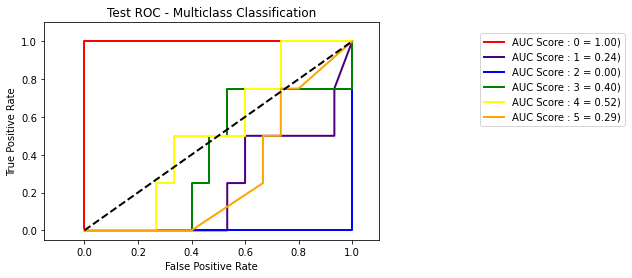

In [26]:
trainX, trainY = getfsData5(testDatalinks, bestl)
trainX=(trainX-trainX.mean())/trainX.std()
trainX = trainX[bestfeatures]

model = LogisticRegression(penalty="l1", max_iter=15, solver = 'liblinear')
model.fit(trainX, trainY)
yPredTrain = model.predict(trainX)
yPredTrainProbs = model.predict_proba(trainX)
score = accuracy_score(yPredTrain, trainY)

print("Test Accuracy : ", score)

cm = confusion_matrix(trainY, yPredTrain)
print('confusion matrix')
print(cm)

yTrainL = preprocessing.label_binarize(trainY, classes=[0, 1, 2, 3, 4, 5])
predTrain = model.decision_function(trainX)
values = [0,1,2,3,4,5]
fpr_values = {}
tpr_values = {}
auc_values = {}
labelColours = itertools.cycle(['red', 'indigo', 'blue', 'green', 'yellow', 'orange'])
scoreLocation = "lower right"


for i in values:
    fpr_values[i], tpr_values[i], temp = roc_curve(yTrainL[:, 0], predTrain[:, i])
    auc_values[i] = auc(fpr_values[i], tpr_values[i])
    
for i, j in zip(range(len(values)), labelColours):
    plt.plot(fpr_values[i], tpr_values[i], color = j, linewidth = 2,
             label='AUC Score : {0} = {1:0.2f})'.format(i, auc_values[i]))
    
plt.plot([0, 1], [0, 1], 'k--', linewidth = 2, markersize=12, color='black')
plt.xlim([-0.15, 1.10])
plt.ylim([-0.05, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC - Multiclass Classification')
plt.legend(loc = scoreLocation,bbox_to_anchor=(1.75, 0.5))
plt.show

### 2(c)-ii

In [27]:
warnings.filterwarnings('ignore')
bestscore = float('-inf')
bestfeatures = []
bestl = 0
data1 = {}
for i in range(1, 21):
    trainX, trainY = getfsData5(trainDatalinks, i)
    model = GaussianNB()    
    model.fit(trainX, trainY)
    yPred = model.predict(trainX)
    acc = accuracy_score(yPred, trainY)
    data1[(i,len(trainX.columns))] = acc
    if acc > bestscore:
        bestscore = acc
        bestl = i
print('Best l value:', bestl)
# print('Best features selected:', bestfeatures)
print('Accuracy score achieved (Train):',bestscore)

Best l value: 20
Accuracy score achieved (Train): 1.0


In [28]:
table4 = pd.DataFrame({'Pair (l,p)': data1.keys(), 'Accuracy score': data1.values()})
table4

Pair (l,p)  Accuracy score
0     (1, 18)        0.971014
1     (2, 36)        0.956522
2     (3, 54)        0.956522
3     (4, 72)        0.956522
4     (5, 90)        0.971014
5    (6, 108)        0.971014
6    (7, 126)        0.971014
7    (8, 144)        0.956522
8    (9, 162)        0.985507
9   (10, 180)        0.971014
10  (11, 198)        0.985507
11  (12, 216)        0.985507
12  (13, 234)        0.971014
13  (14, 252)        0.985507
14  (15, 270)        0.985507
15  (16, 288)        0.985507
16  (17, 306)        0.985507
17  (18, 324)        0.985507
18  (19, 342)        0.985507
19  (20, 360)        1.000000

train score:  1.0
confusion matrix
[[ 9  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 12]]


<function matplotlib.pyplot.show(close=None, block=None)>

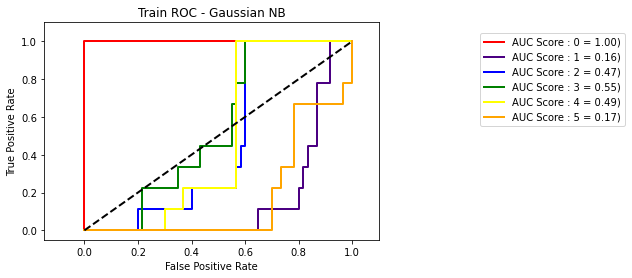

In [29]:
trainX, trainY = getfsData5(trainDatalinks, bestl)

model = GaussianNB()    
model.fit(trainX, trainY)
yPredTrain = model.predict(trainX)
yPredTrainProbs = model.predict_proba(trainX)
score = accuracy_score(yPredTrain, trainY)

print("train score: ", score)

cm = confusion_matrix(trainY, yPredTrain)
print('confusion matrix')
print(cm)


yTrainL = preprocessing.label_binarize(trainY, classes=[0, 1, 2, 3, 4, 5])
predTrain = model.predict_log_proba(trainX)
values = [0,1,2,3,4,5]
fpr_values = {}
tpr_values = {}
auc_values = {}
labelColours = itertools.cycle(['red', 'indigo', 'blue', 'green', 'yellow', 'orange'])
scoreLocation = "lower right"


for i in values:
    fpr_values[i], tpr_values[i], temp = roc_curve(yTrainL[:, 0], predTrain[:, i])
    auc_values[i] = auc(fpr_values[i], tpr_values[i])
    
for i, j in zip(range(len(values)), labelColours):
    plt.plot(fpr_values[i], tpr_values[i], color = j, linewidth = 2,
             label='AUC Score : {0} = {1:0.2f})'.format(i, auc_values[i]))
    
plt.plot([0, 1], [0, 1], 'k--', linewidth = 2, markersize=12, color='black')
plt.xlim([-0.15, 1.10])
plt.ylim([-0.05, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC - Gaussian NB')
plt.legend(loc = scoreLocation,bbox_to_anchor=(1.75, 0.5))
plt.show

test score:  1.0
confusion matrix
[[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 3]]


<function matplotlib.pyplot.show(close=None, block=None)>

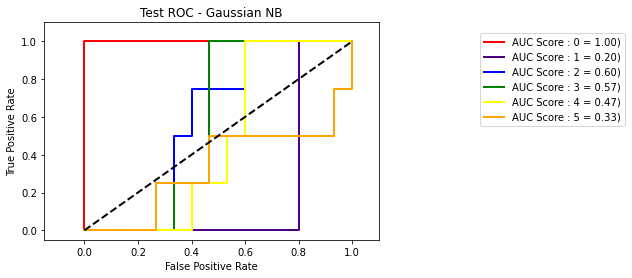

In [30]:
testX, testY = getfsData5(testDatalinks, bestl)

model = GaussianNB()    
model.fit(testX, testY)
yPredTrain = model.predict(testX)
yPredTrainProbs = model.predict_proba(testX)
score = accuracy_score(yPredTrain, testY)

print("test score: ", score)

cm = confusion_matrix(testY, yPredTrain)
print('confusion matrix')
print(cm)


yTrainL = preprocessing.label_binarize(testY, classes=[0, 1, 2, 3, 4, 5])
predTrain = model.predict_log_proba(testX)
values = [0,1,2,3,4,5]
fpr_values = {}
tpr_values = {}
auc_values = {}
labelColours = itertools.cycle(['red', 'indigo', 'blue', 'green', 'yellow', 'orange'])
scoreLocation = "lower right"


for i in values:
    fpr_values[i], tpr_values[i], temp = roc_curve(yTrainL[:, 0], predTrain[:, i])
    auc_values[i] = auc(fpr_values[i], tpr_values[i])
    
for i, j in zip(range(len(values)), labelColours):
    plt.plot(fpr_values[i], tpr_values[i], color = j, linewidth = 2,
             label='AUC Score : {0} = {1:0.2f})'.format(i, auc_values[i]))
    
plt.plot([0, 1], [0, 1], 'k--', linewidth = 2, markersize=12, color='black')
plt.xlim([-0.15, 1.10])
plt.ylim([-0.05, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC - Gaussian NB')
plt.legend(loc = scoreLocation,bbox_to_anchor=(1.75, 0.5))
plt.show

In [31]:
bestscore = float('-inf')
bestfeatures = []
bestl = 0
data1 = {}
for i in range(1, 21):
    trainX, trainY = getfsData5(trainDatalinks, i)
    model = MultinomialNB()    
    model.fit(trainX, trainY)
    yPred = model.predict(trainX)
    acc = accuracy_score(yPred, trainY)
    data1[(i,len(trainX.columns))] = acc
    if acc >= bestscore:
        bestscore = acc
        bestl = i
print('Best l value:', bestl)
# print('Best features selected:', bestfeatures)
print('Accuracy score achieved (Train):',bestscore)

Best l value: 16
Accuracy score achieved (Train): 0.9710144927536232


In [32]:
table5 = pd.DataFrame({'Pair (l,p)': data1.keys(), 'Accuracy score': data1.values()})
table5

Pair (l,p)  Accuracy score
0     (1, 18)        0.913043
1     (2, 36)        0.956522
2     (3, 54)        0.971014
3     (4, 72)        0.956522
4     (5, 90)        0.971014
5    (6, 108)        0.956522
6    (7, 126)        0.971014
7    (8, 144)        0.956522
8    (9, 162)        0.956522
9   (10, 180)        0.956522
10  (11, 198)        0.956522
11  (12, 216)        0.956522
12  (13, 234)        0.956522
13  (14, 252)        0.956522
14  (15, 270)        0.956522
15  (16, 288)        0.971014
16  (17, 306)        0.956522
17  (18, 324)        0.956522
18  (19, 342)        0.942029
19  (20, 360)        0.942029

train score:  0.9710144927536232
confusion matrix
[[ 9  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 1  0  0 11  0  0]
 [ 0  0  0  1 11  0]
 [ 0  0  0  0  0 12]]


<function matplotlib.pyplot.show(close=None, block=None)>

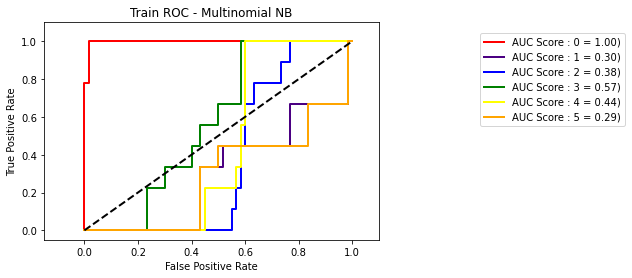

In [33]:
trainX, trainY = getfsData5(trainDatalinks, bestl)

model = MultinomialNB()   
model.fit(trainX, trainY)
yPredTrain = model.predict(trainX)
yPredTrainProbs = model.predict_proba(trainX)
score = accuracy_score(yPredTrain, trainY)

print("train score: ", score)

cm = confusion_matrix(trainY, yPredTrain)
print('confusion matrix')
print(cm)


yTrainL = preprocessing.label_binarize(trainY, classes=[0, 1, 2, 3, 4, 5])
predTrain = model.predict_log_proba(trainX)
values = [0,1,2,3,4,5]
fpr_values = {}
tpr_values = {}
auc_values = {}
labelColours = itertools.cycle(['red', 'indigo', 'blue', 'green', 'yellow', 'orange'])
scoreLocation = "lower right"


for i in values:
    fpr_values[i], tpr_values[i], temp = roc_curve(yTrainL[:, 0], predTrain[:, i])
    auc_values[i] = auc(fpr_values[i], tpr_values[i])
    
for i, j in zip(range(len(values)), labelColours):
    plt.plot(fpr_values[i], tpr_values[i], color = j, linewidth = 2,
             label='AUC Score : {0} = {1:0.2f})'.format(i, auc_values[i]))
    
plt.plot([0, 1], [0, 1], 'k--', linewidth = 2, markersize=12, color='black')
plt.xlim([-0.15, 1.10])
plt.ylim([-0.05, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC - Multinomial NB')
plt.legend(loc = scoreLocation,bbox_to_anchor=(1.75, 0.5))
plt.show

test score:  0.9473684210526315
confusion matrix
[[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 2 0 1 0]
 [0 0 0 3 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 3]]


<function matplotlib.pyplot.show(close=None, block=None)>

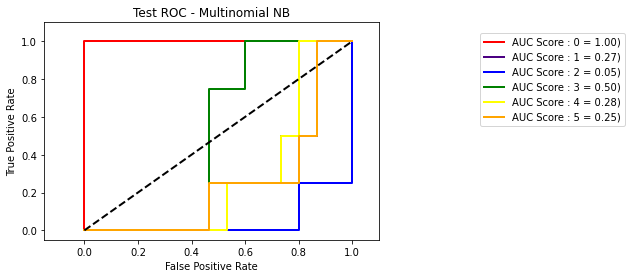

In [34]:
testX, testY = getfsData5(testDatalinks, bestl)

model = MultinomialNB()   
model.fit(testX, testY)
yPredTrain = model.predict(testX)
yPredTrainProbs = model.predict_proba(testX)
score = accuracy_score(yPredTrain, testY)

print("test score: ", score)

cm = confusion_matrix(testY, yPredTrain)
print('confusion matrix')
print(cm)


yTrainL = preprocessing.label_binarize(testY, classes=[0, 1, 2, 3, 4, 5])
predTrain = model.predict_log_proba(testX)
values = [0,1,2,3,4,5]
fpr_values = {}
tpr_values = {}
auc_values = {}
labelColours = itertools.cycle(['red', 'indigo', 'blue', 'green', 'yellow', 'orange'])
scoreLocation = "lower right"


for i in values:
    fpr_values[i], tpr_values[i], temp = roc_curve(yTrainL[:, 0], predTrain[:, i])
    auc_values[i] = auc(fpr_values[i], tpr_values[i])
    
for i, j in zip(range(len(values)), labelColours):
    plt.plot(fpr_values[i], tpr_values[i], color = j, linewidth = 2,
             label='AUC Score : {0} = {1:0.2f})'.format(i, auc_values[i]))
    
plt.plot([0, 1], [0, 1], 'k--', linewidth = 2, markersize=12, color='black')
plt.xlim([-0.15, 1.10])
plt.ylim([-0.05, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC - Multinomial NB')
plt.legend(loc = scoreLocation,bbox_to_anchor=(1.75, 0.5))
plt.show

### 2(c)-iii

#### Gaussian NB performed better for multi-class classification in this problem.

#### 3 ISLR, 4.8.3

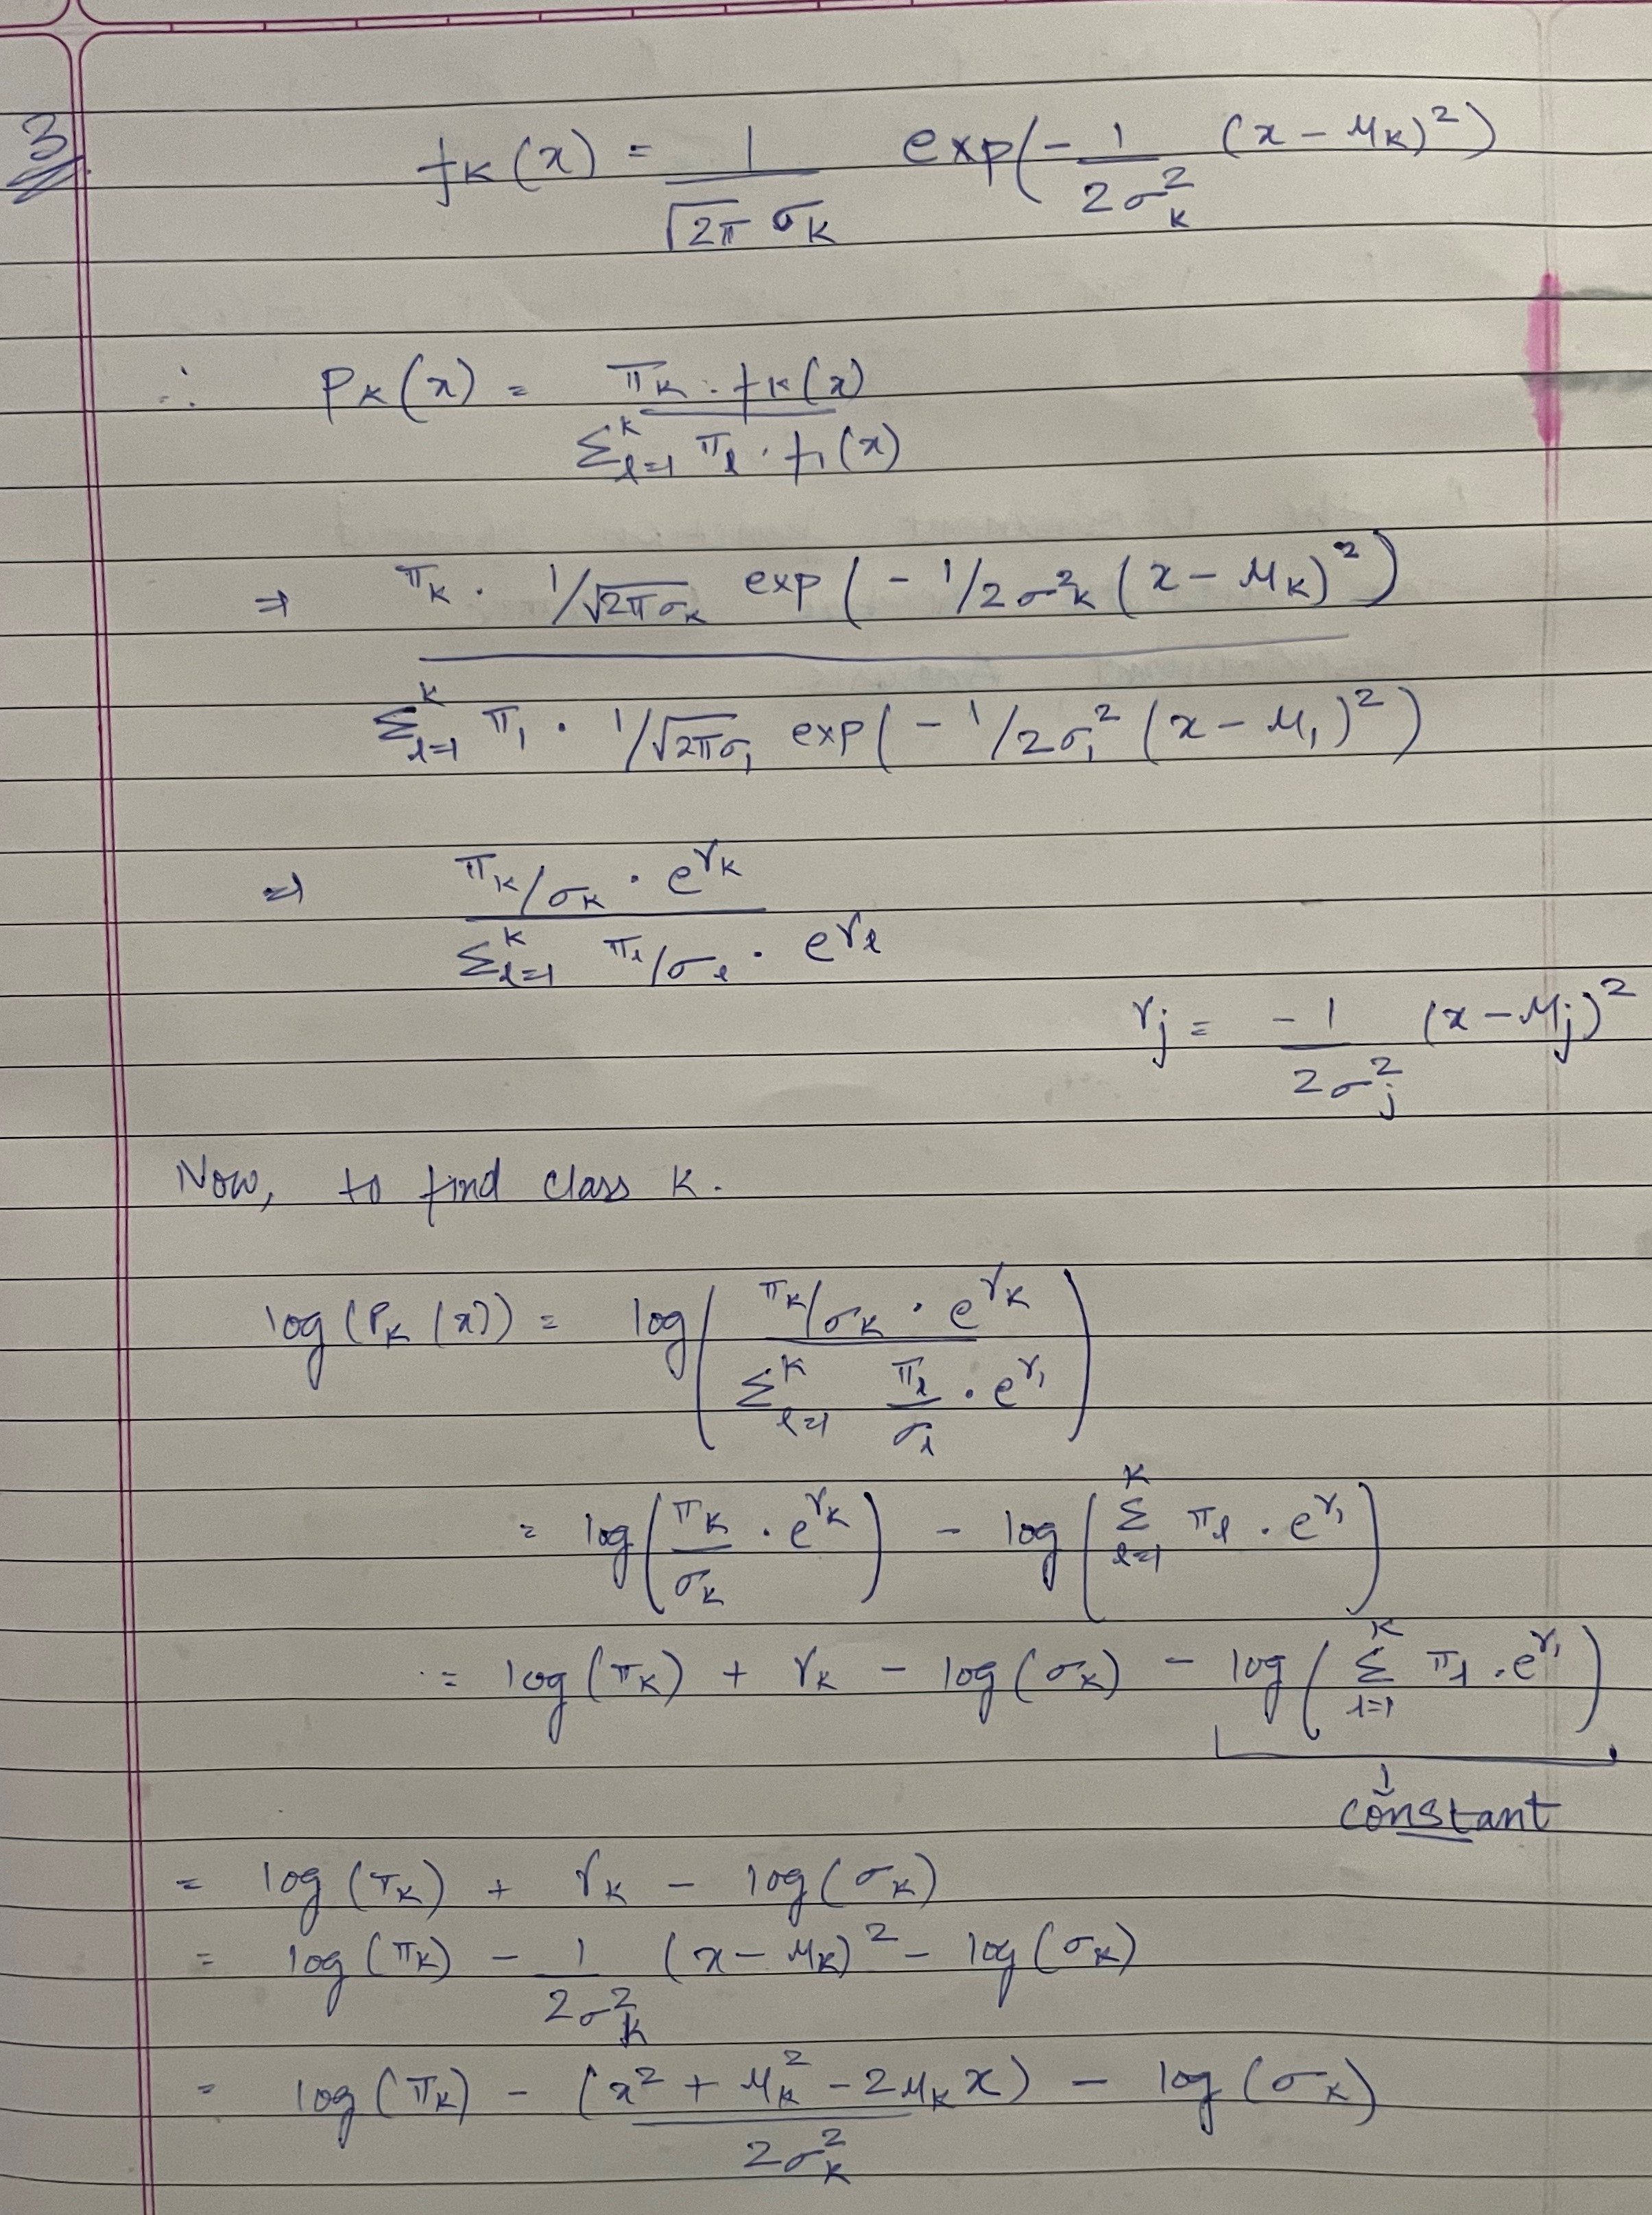

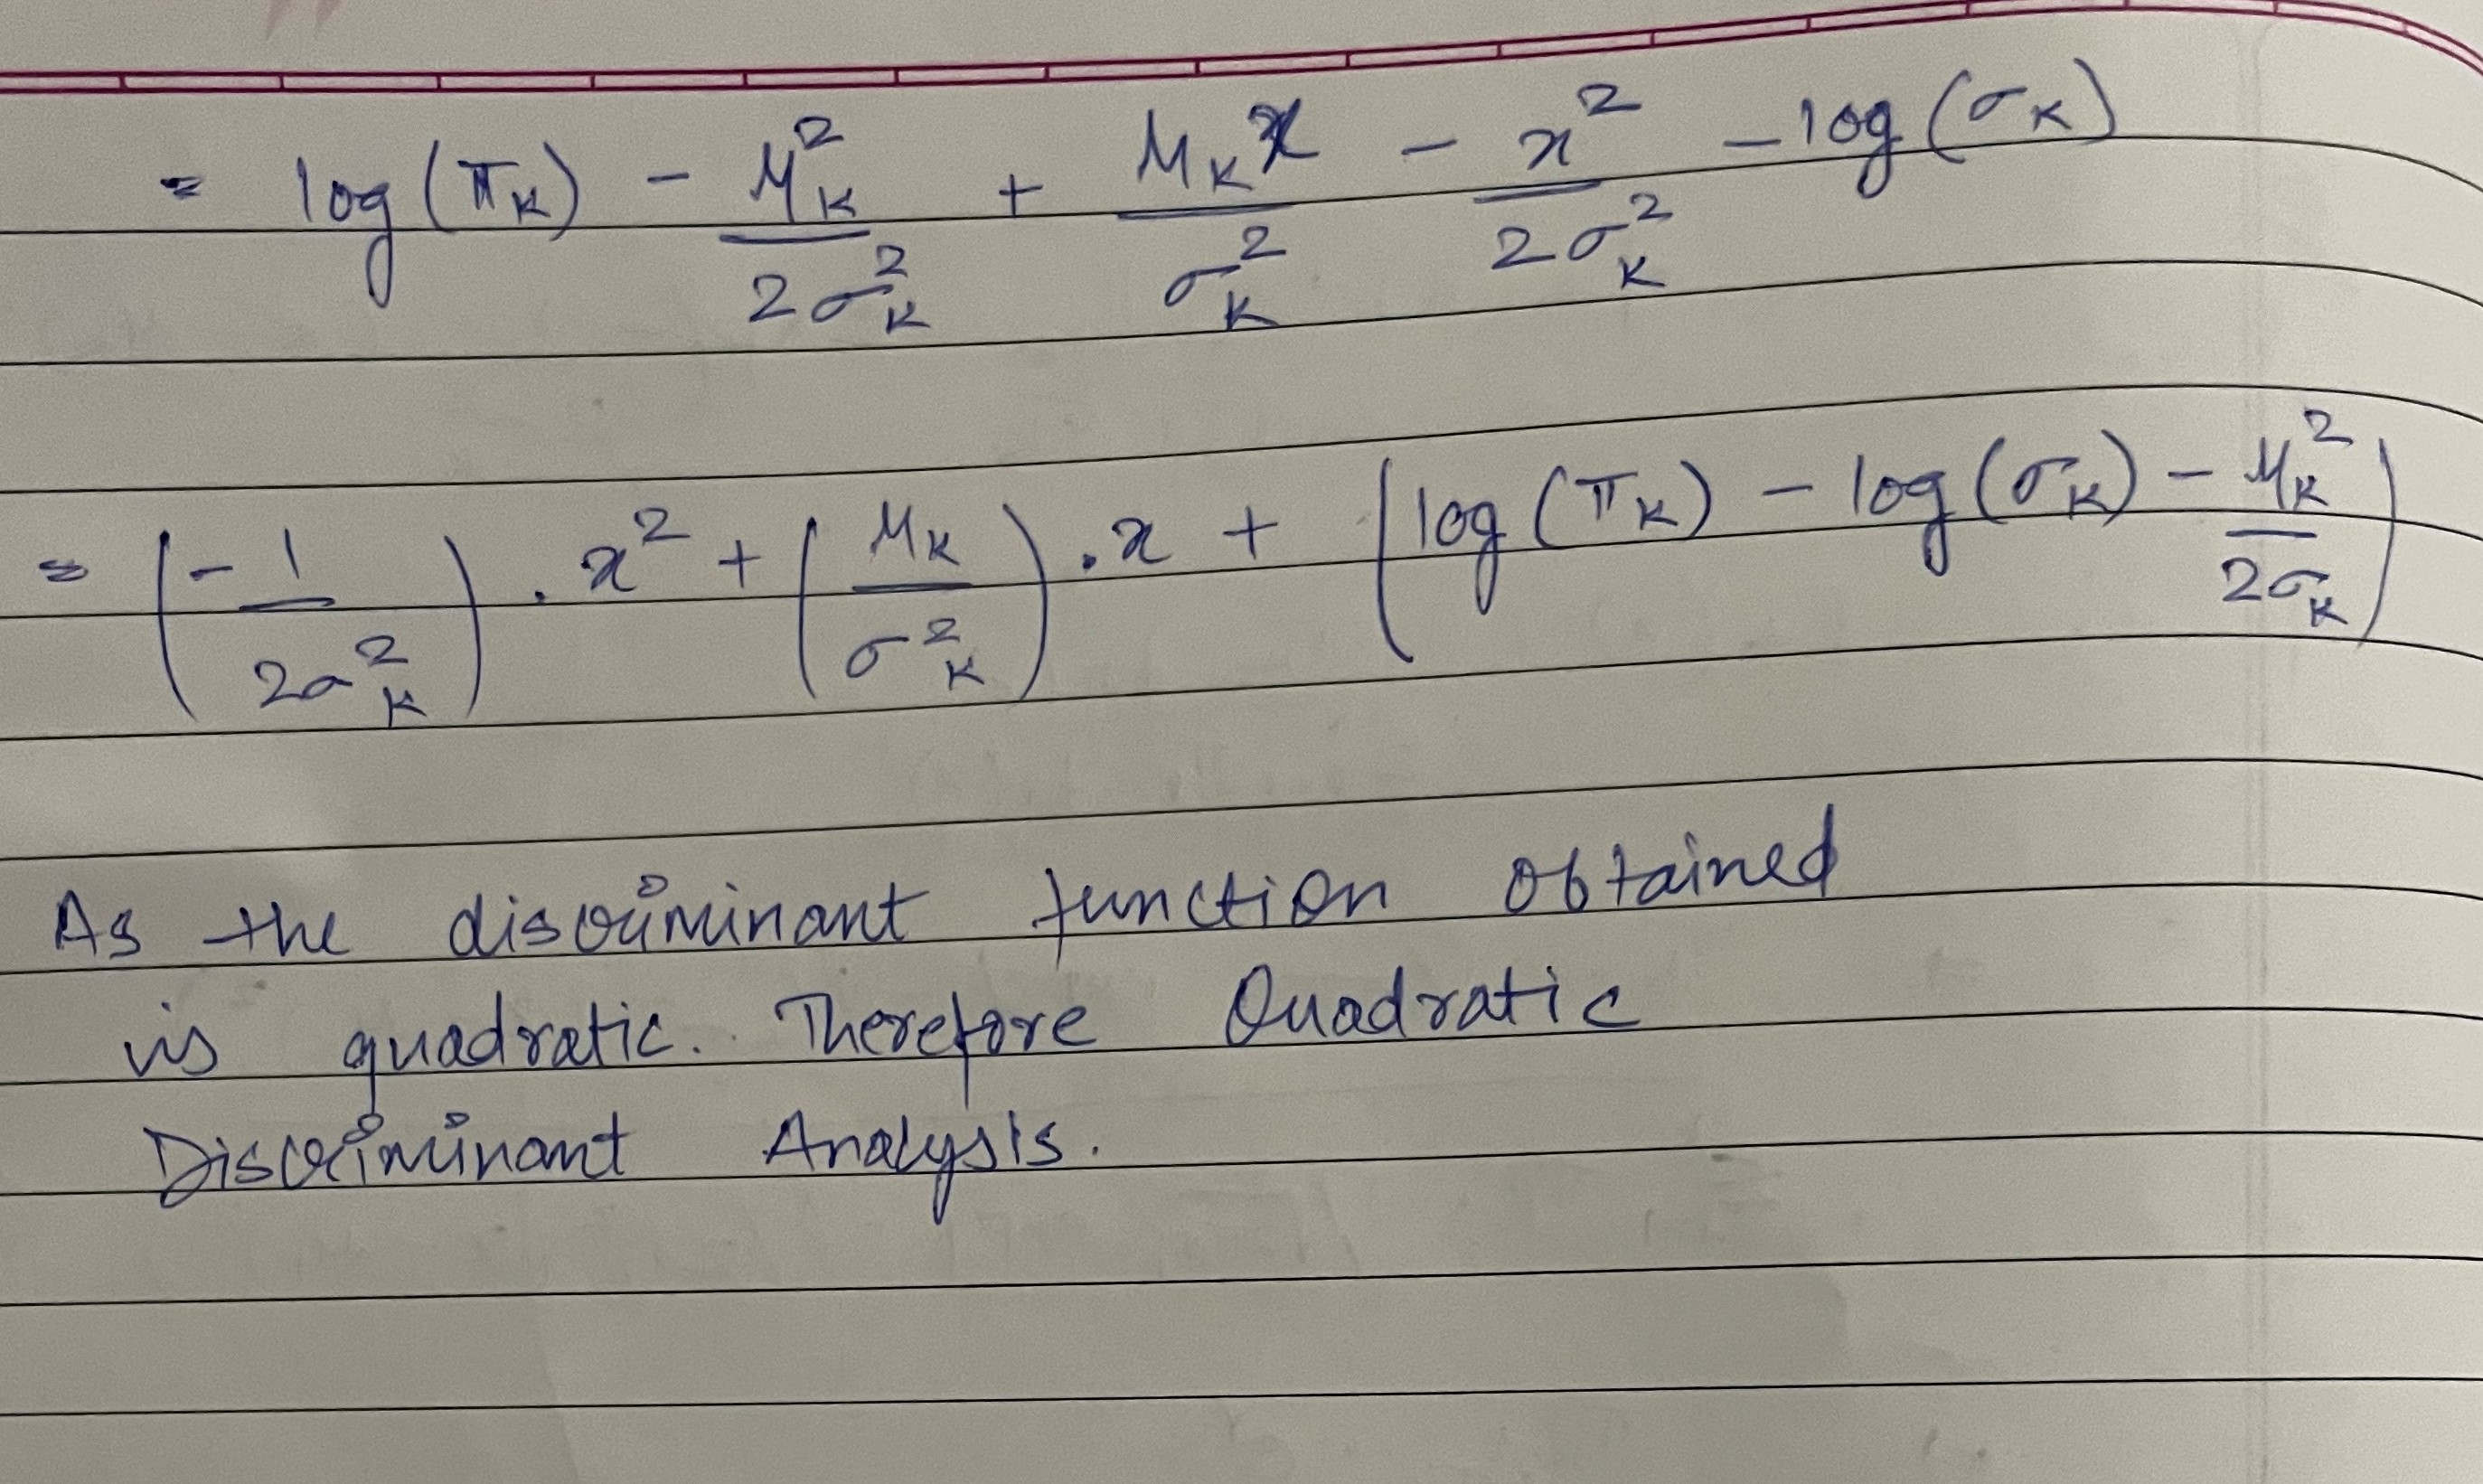

#### 4. ISLR 4.8.7

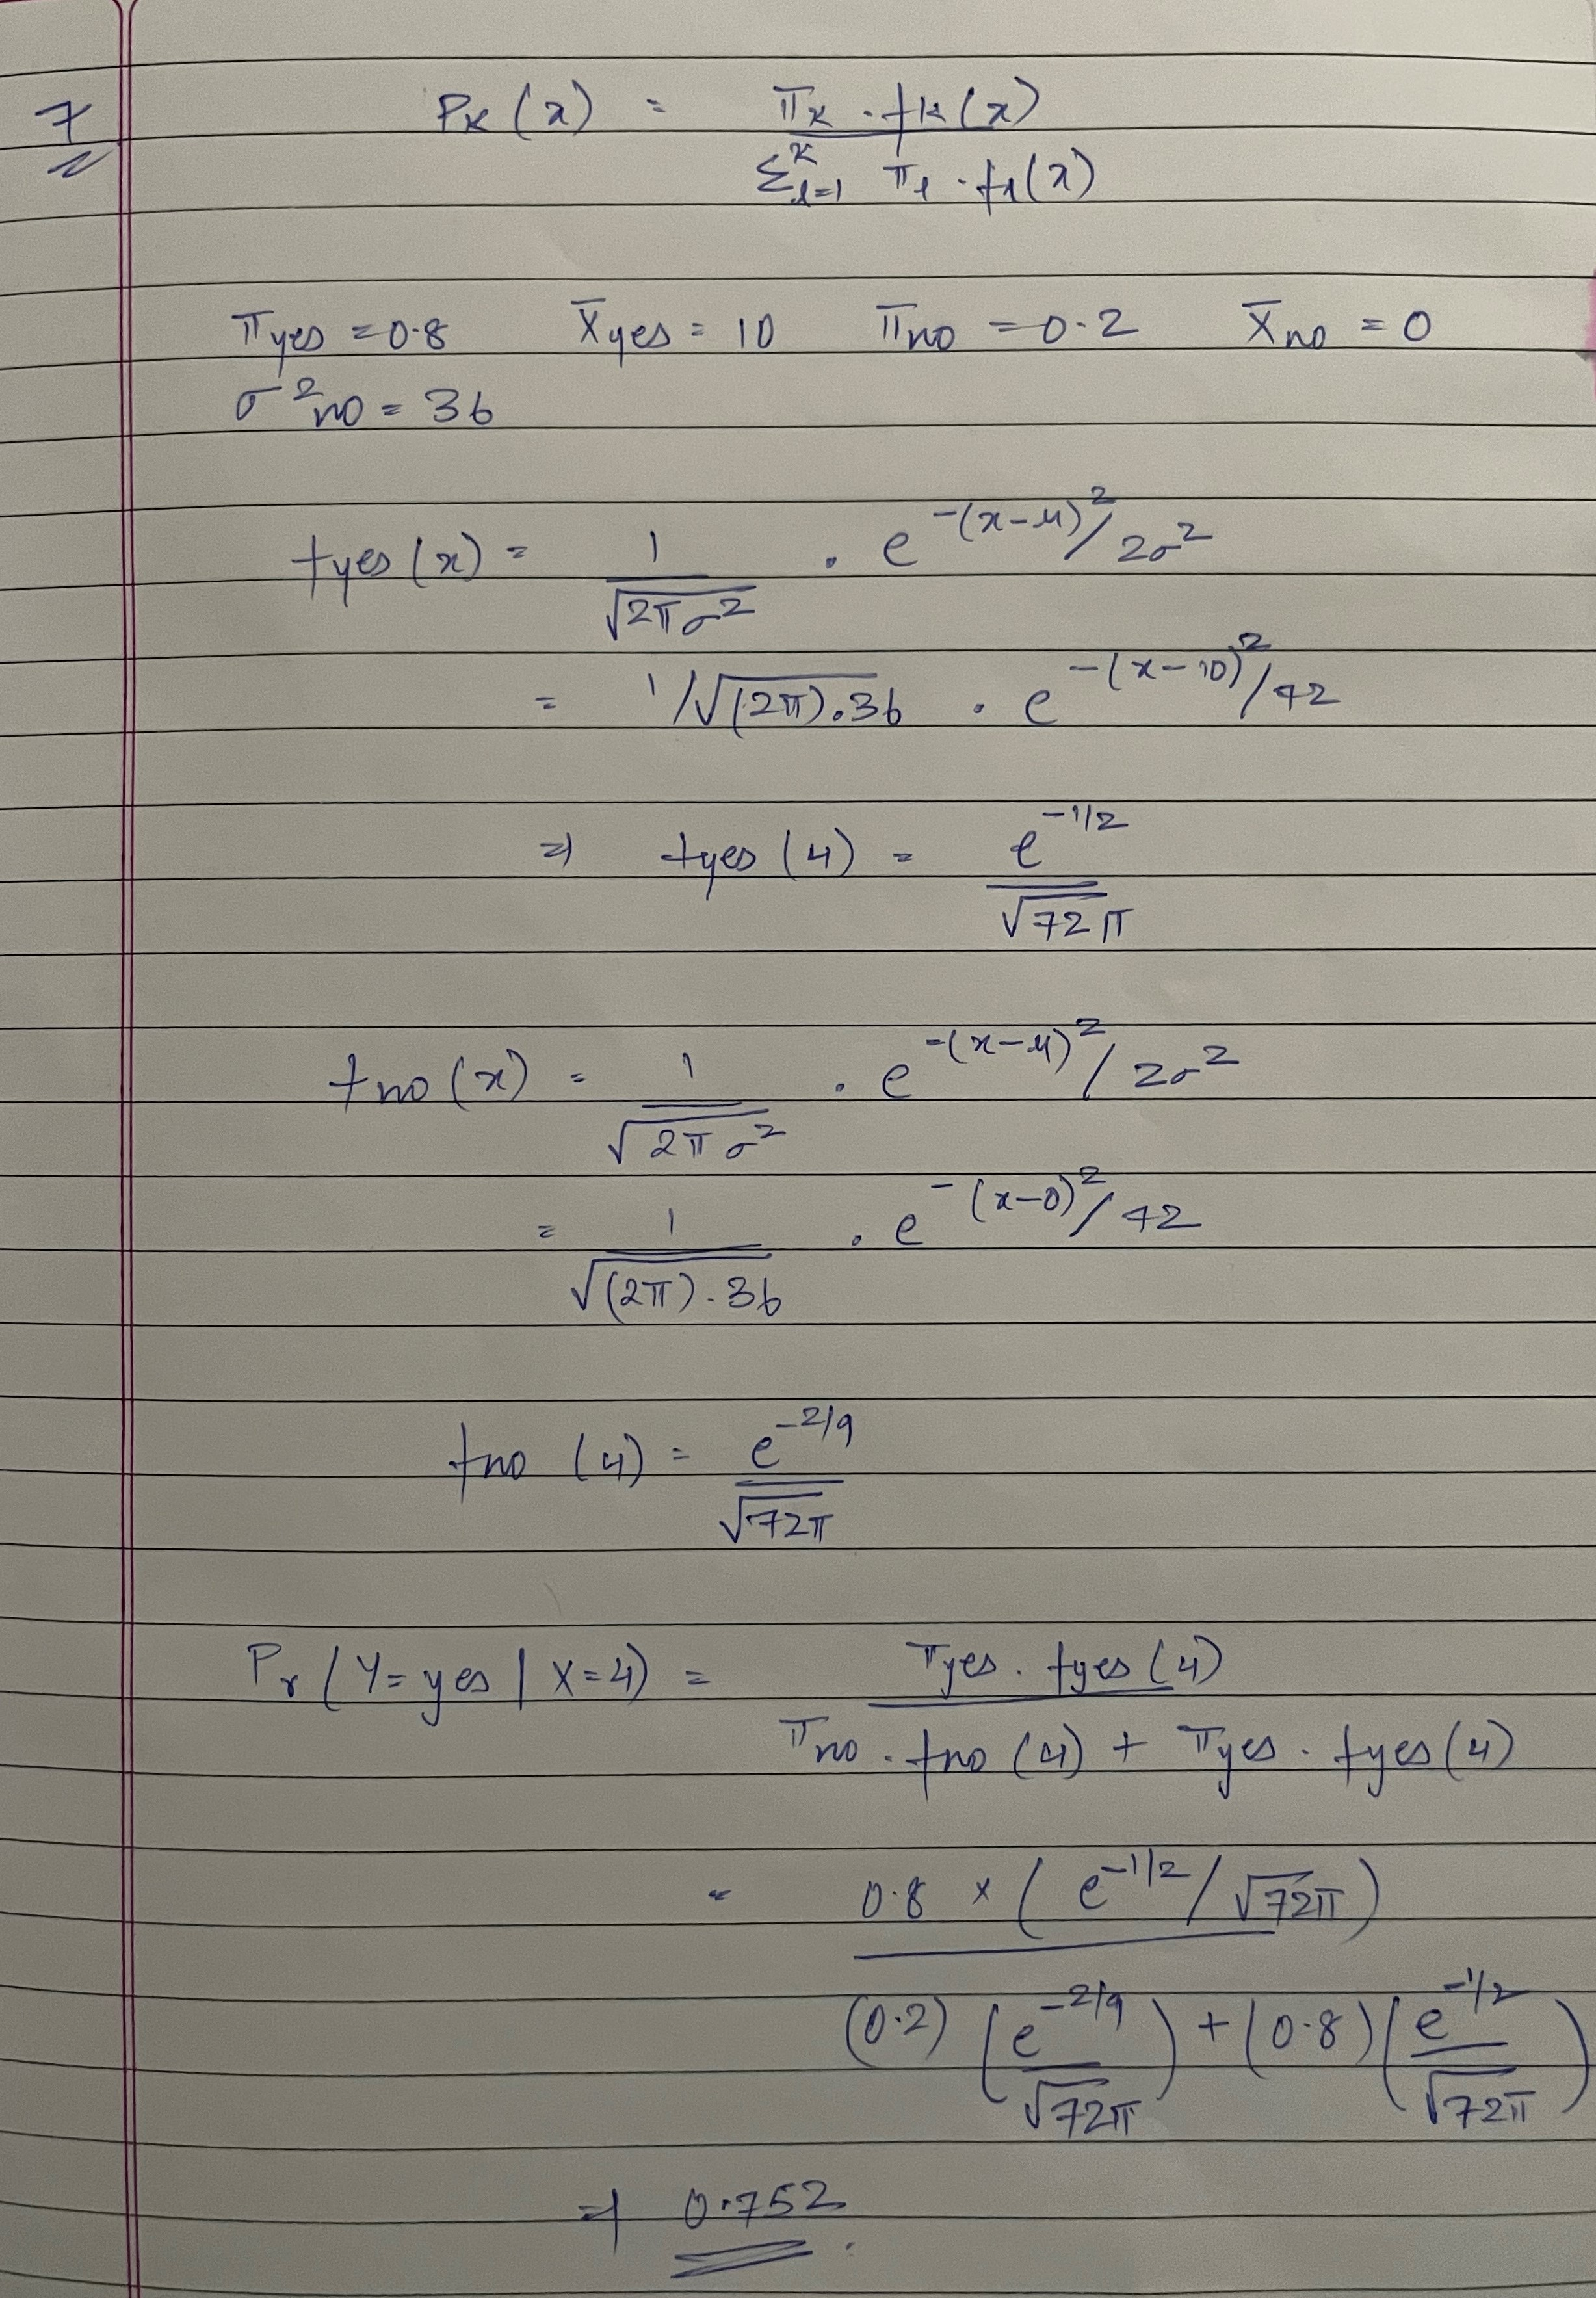